In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import cm, patches
import numpy as np
%matplotlib inline

In [2]:
def classify(value, classes, cmap, extend=None):
    """
    Return a color tuple (R, G, B, trans) for the chosen value
    according to a list of classes
    Inputs:
        value       -   numeric value
        classes     -   list with classes
        cmap        -   colormap object (e.g. cm.jet)
        extend      -   either 'min', 'max' or 'both'. Indicates whether the 
                        list of classes is extended on left or right side
                        if values smaller/larger than the most extreme values
                        in the list of classes are also feasible
    """
    # first estimate a number between 0 and one
    idx = 0
    if np.logical_or(extend == 'min', extend == 'max'):
        nrClasses = len(classes)
    elif extend == 'both':
        nrClasses = len(classes) + 1
    else:
        nrClasses = len(classes) - 1
    # define the color locations in cmap per class
    lookup = np.linspace(0, 1, nrClasses)
    
    if np.logical_or(extend == 'min', extend == 'both'):
        idx_start = 0
    else:
        idx_start = 1
    if np.logical_or(extend == 'max', extend == 'both'):
        idx_end   = len(classes)
    else:
        idx_end   = len(classes)-1
    
        
    for n, Class in enumerate(classes[idx_start:idx_end]):
        if value > Class:
            idx += 1
    return cmap(lookup[idx])


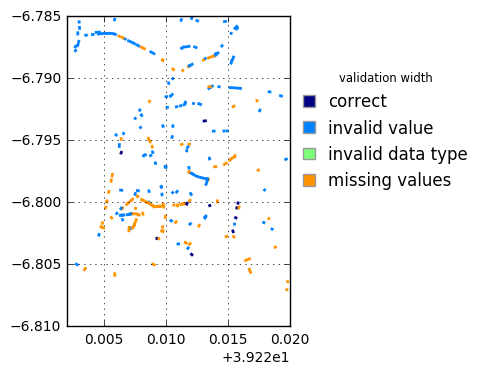

In [11]:
def classify_legend(cax, classes, class_names, cmap, class_title):
    allFaceColors = []
    p = []
    classLabels = []

    for n, Class in enumerate(classes):
        classLabels.append('{:d}'.format(Class))
        classColor = classify(Class, classes, cmap, extend='both')
        allFaceColors.append(classColor)
        ClassPatch = patches.Rectangle((0,0), 1, 1, fc=classColor, ec='#999999')
        p.append(ClassPatch)

    leg = cax.legend(p, class_names, ncol=1, bbox_to_anchor=None, handlelength=.7, prop=None, title=class_title) # ,columnspacing=.75,handletextpad=.25, , 
    leg.draw_frame(False)
    plt.setp(leg.get_title(),fontsize='small')
    return cax
    
def plot_lines_gpd(fn, key, vmin=0., vmax=4., cmap=cm.jet, classes=range(4),
                   class_names=['correct', 'invalid value', 'invalid data type', 'missing values'],
                   class_title='validation'):
    gpd_obj = gpd.read_file(fn)
    # plt.style.use('classic')
    fig, ax = plt.subplots(subplot_kw=dict(aspect='equal'))
    fig.subplots_adjust(right=0.8)
    plt.grid()
    gpd_obj.plot(ax=ax, column=key, cmap=cmap, linewidth=2., vmin=vmin, vmax=vmax)
    cax = fig.add_axes([0.82, 0.3, 0.15, 0.5])
    cax.axis('off')
    cax = classify_legend(cax, classes, class_names, cmap, class_title)
    return ax
    
fn = r'd:\test\manzese_valid\gis_files\manzese_culverts_geo.json'
cmap = 'jet'
classes = [0, 1, 2, 3]
plot_lines_gpd(fn, 'width_flag',
                   class_names=['correct', 'invalid value', 'invalid data type', 'missing values'],
                   class_title='validation width')

#plt.colorbar(p)


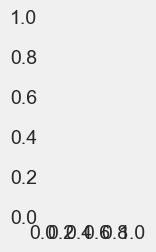

In [66]:
f = plt.figure()
f.add_axes([0.8, 0.3, 0.15, 0.5])
plt.grid()

In [17]:
p[0]

TypeError: 'AxesSubplot' object does not support indexing

[None]

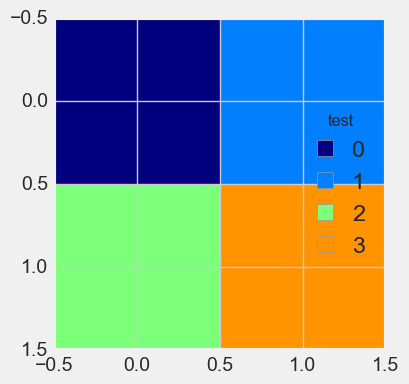

In [53]:
aa = np.array([[0., 1],[2., 3.]])
fig2, ax2 = plt.subplots()

plt.imshow(aa, vmin=0., vmax=4., interpolation='nearest', cmap='jet')
leg = ax2.legend(p, classLabels, loc='right', ncol=1, bbox_to_anchor=None, handlelength=.7, prop=None, title='test') # ,columnspacing=.75,handletextpad=.25, , 
leg.draw_frame(False)
plt.setp(leg.get_title(),fontsize='small')
